In [ ]:
!apt-get update -y
!apt install python3.10-venv

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!python3 -m venv data_science_env

In [ ]:
!source data_science_env/bin/activate

In [ ]:
! pip install -r requirements.txt

  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 24.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Un

In [ ]:
# 1. Instalación de las bibliotecas necesarias (si aún no las tienes instaladas)
!pip install dash
!pip install openpyxl  # Necesario si tienes que trabajar con archivos .xlsx en el futuro

# 2. Importación de las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Habilita la salida de gráficos de Bokeh en el notebook
output_notebook()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:
# Cargar el conjunto de datos desde la URL
url = "https://raw.githubusercontent.com/FloZewi/E-commerce-Data-Analysis/refs/heads/master/ecommerce_product_dataset.csv"
data = pd.read_csv(url)

# Mostrar las primeras cinco filas para verificar la carga
data.head()


,ProductID,ProductName,Category,Price,Rating,NumReviews,StockQuantity,Discount,Sales,DateAdded
0,1,Headphones,Electronics,400.31,1.7,3772,20,0.08,466,2023-11-08
1,2,Headphones,Electronics,235.03,2.3,2919,663,0.33,1332,2023-09-26
2,3,Smartwatch,Electronics,417.90,1.8,1184,459,0.31,252,2023-10-18
3,4,Smartphone,Electronics,152.70,3.4,2047,475,0.49,1806,2023-12-03
4,5,Laptop,Electronics,394.74,1.8,1267,831,0.23,1508,2023-08-08


In [ ]:
# Verificar valores faltantes
print(data.isnull().sum())

# Obtener estadísticas resumidas
print(data.describe())

# Filtrar datos para mostrar solo ventas exitosas
if 'Quantity' in data.columns:
    data = data[data['Quantity'] > 0]

ProductID        0
ProductName      0
Category         0
Price            0
Rating           0
NumReviews       0
StockQuantity    0
Discount         0
Sales            0
DateAdded        0
dtype: int64
         ProductID       Price       Rating   NumReviews  StockQuantity  \
count  1000.000000  1000.00000  1000.000000  1000.000000    1000.000000   
mean    500.500000   253.77551     3.025600  2498.753000     495.395000   
std     288.819436   141.40362     1.151004  1463.241871     292.799253   
min       1.000000    10.11000     1.000000     3.000000       0.000000   
25%     250.750000   133.09250     2.100000  1201.750000     241.750000   
50%     500.500000   251.31000     3.100000  2476.000000     505.000000   
75%     750.250000   375.82750     4.000000  3797.500000     743.500000   
max    1000.000000   499.74000     5.000000  4994.000000     993.000000   

          Discount        Sales  
count  1000.000000  1000.000000  
mean      0.251640  1011.037000  
std       0.146455 

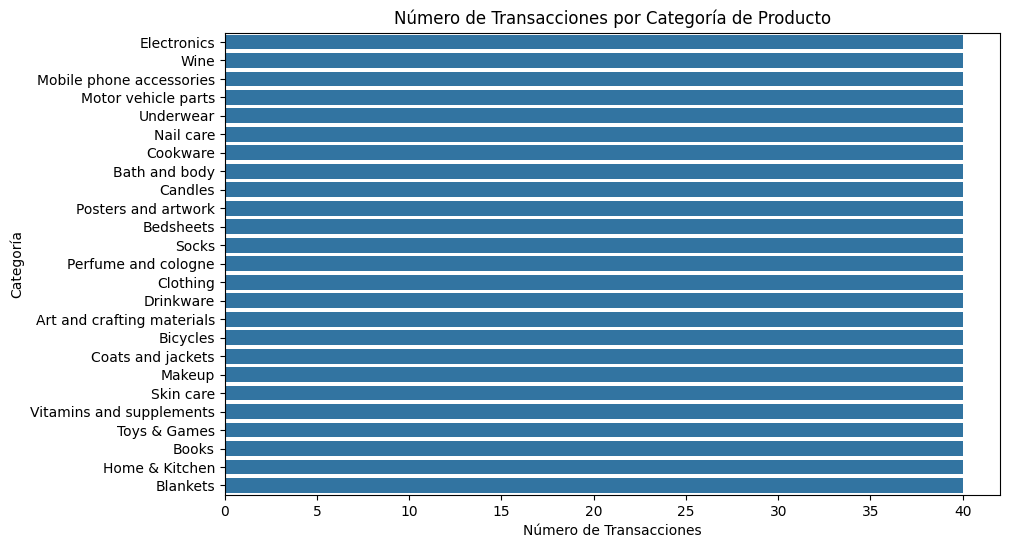

In [ ]:
# Gráfico de transacciones por categoría
if 'Category' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
    plt.title('Número de Transacciones por Categoría de Producto')
    plt.xlabel('Número de Transacciones')
    plt.ylabel('Categoría')
    plt.show()

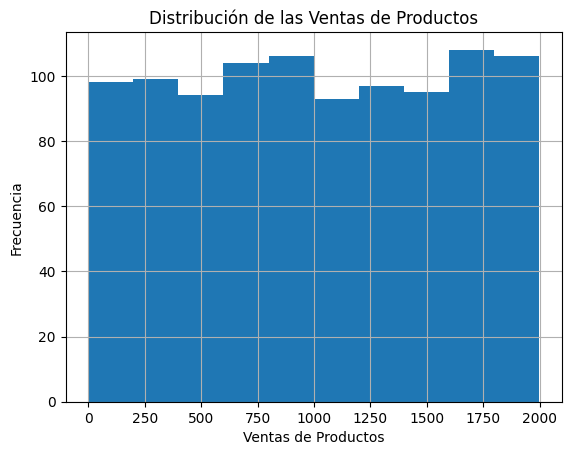

In [ ]:
# Histograma para las ventas de productos
if 'Sales' in data.columns:
    data['Sales'].hist()
    plt.xlabel('Ventas de Productos')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de las Ventas de Productos')
    plt.show()

In [ ]:
# Gráfico de dispersión entre precio y ventas por categoría
if 'Sales' in data.columns and 'Price' in data.columns:
    fig = px.scatter(data, x="Sales", y="Price", color="Category", title="Relación entre Ventas y Precio por Categoría de Producto")
    fig.show()

In [ ]:
# Gráfico de línea para las ventas por fecha
if 'DateAdded' in data.columns:
    data['DateAdded'] = pd.to_datetime(data['DateAdded'])
    sales_per_date = data.groupby(data['DateAdded'].dt.date)['Sales'].sum()

    p = figure(title="Ventas de Productos por Fecha", x_axis_label='Fecha', y_axis_label='Ventas')
    p.line(x=sales_per_date.index, y=sales_per_date.values, legend_label="Ventas Diarias", line_width=1)

    show(p)